In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 确保图表在notebook中显示
%matplotlib inline

In [79]:
# 读取数据
data = pd.read_csv(r'flood_prediction_dataset/train.csv')
test = pd.read_csv(r'flood_prediction_dataset/test.csv')

In [80]:
# 查看数据
data.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [81]:
# 检查数据的基本信息
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [82]:
# 处理缺失值
data = data.dropna()

# 分离特征和目标变量
X = data.drop(columns = ['FloodProbability', 'id'], axis = 1)
y = data['FloodProbability']

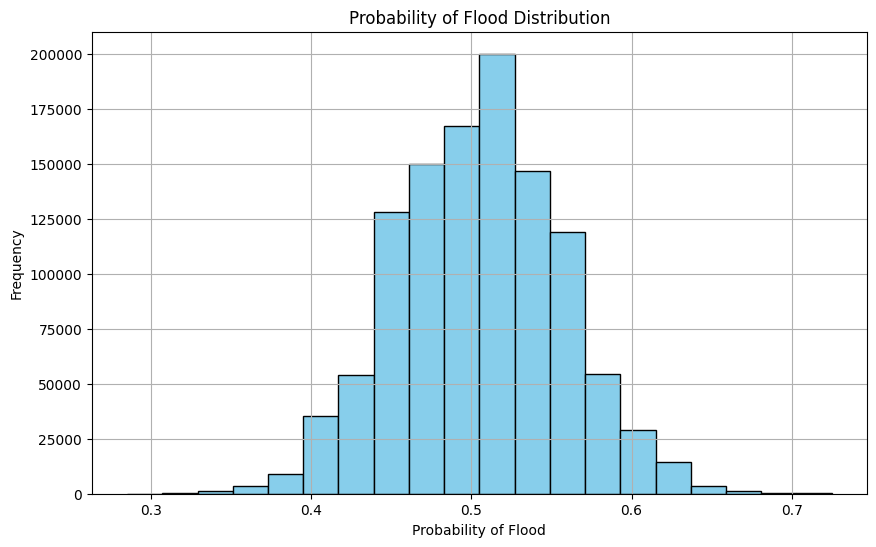

In [83]:
# 绘制直方图
plt.figure(figsize=(10, 6))
plt.hist(data['FloodProbability'], bins=20, color='skyblue', edgecolor='black')
plt.title('Probability of Flood Distribution')
plt.xlabel('Probability of Flood')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

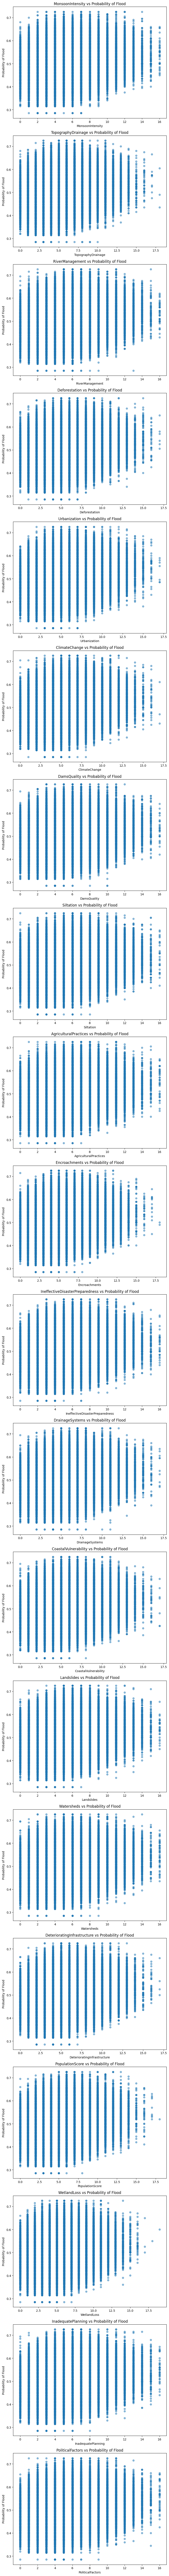

In [84]:
# 绘制散点图
fig, axs = plt.subplots(nrows=len(X.columns), figsize=(8, 6*len(X.columns)))

for i, col in enumerate(X.columns):
    axs[i].scatter(X[col], y, alpha=0.5)
    axs[i].set_title(col + ' vs Probability of Flood')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Probability of Flood')

plt.tight_layout()
plt.show()

对这20个特征分析，发现其与标签都有关联，说明每个特征都很重要不能丢弃，于是不采用PCA降维

In [85]:
# # PCA降维
# from sklearn.decomposition import PCA

# pca = PCA(n_components=0.95)
# X_pca = pca.fit_transform(X_scaled)

# # 查看主成分的数量
# print(f"Number of principal components: {X_pca.shape[1]}")

In [86]:
# 标准化特征
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [100]:
# 分割数据集为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
# pca代码，已弃用

In [101]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [102]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train, y_train)

ElasticNet(random_state=42)

In [103]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [114]:
from catboost import CatBoostRegressor
catboost = CatBoostRegressor()
catboost.fit(X_train, y_train)

Learning rate set to 0.119817
0:	learn: 0.0501723	total: 200ms	remaining: 3m 19s
1:	learn: 0.0493197	total: 254ms	remaining: 2m 6s
2:	learn: 0.0484621	total: 306ms	remaining: 1m 41s
3:	learn: 0.0476957	total: 361ms	remaining: 1m 29s
4:	learn: 0.0469464	total: 413ms	remaining: 1m 22s
5:	learn: 0.0462136	total: 465ms	remaining: 1m 17s
6:	learn: 0.0455094	total: 515ms	remaining: 1m 13s
7:	learn: 0.0448639	total: 572ms	remaining: 1m 10s
8:	learn: 0.0442080	total: 629ms	remaining: 1m 9s
9:	learn: 0.0435677	total: 684ms	remaining: 1m 7s
10:	learn: 0.0429993	total: 729ms	remaining: 1m 5s
11:	learn: 0.0424384	total: 775ms	remaining: 1m 3s
12:	learn: 0.0418800	total: 822ms	remaining: 1m 2s
13:	learn: 0.0413436	total: 871ms	remaining: 1m 1s
14:	learn: 0.0408240	total: 920ms	remaining: 1m
15:	learn: 0.0402937	total: 968ms	remaining: 59.5s
16:	learn: 0.0397883	total: 1.01s	remaining: 58.7s
17:	learn: 0.0393224	total: 1.06s	remaining: 57.9s
18:	learn: 0.0388566	total: 1.11s	remaining: 57.1s
19:	lea

In [116]:
# 预测
y_pred_linear = linear_model.predict(X_test)
y_pred_elastic = elastic_net.predict(X_test)
y_pred_xgboost = xgb_regressor.predict(X_test)
y_pred_catboost = catboost.predict(X_test)

In [117]:
# 计算评估指标
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, mae, r2


In [124]:
# 线性回归评估
mse_linear, rmse_linear, mae_linear, r2_linear = evaluate_model(y_test, y_pred_linear)
print(f"Linear Regression - MSE: {mse_linear}, RMSE: {rmse_linear}, MAE: {mae_linear}, R2: {r2_linear}")

# 弹性网络评估
mse_elastic, rmse_elastic, mae_elastic, r2_elastic = evaluate_model(y_test, y_pred_elastic)
print(f"Elastic Net - MSE: {mse_elastic}, RMSE: {rmse_elastic}, MAE: {mae_elastic}, R2: {r2_elastic}")

# XGBoost评估
mse_xgb, rmse_xgb, mae_xgb, r2_xgb = evaluate_model(y_test, y_pred_xgboost)
print(f"XGBRegressor - MSE: {mse_xgb}, RMSE: {rmse_xgb}, MAE: {mae_xgb}, R2: {r2_xgb}")

# CatBoost评估
mse_cab, rmse_cab, mae_cab, r2_cab = evaluate_model(y_test, y_pred_catboost)
print(f"CatBoost - MSE: {mse_cab}, RMSE: {rmse_cab}, MAE: {mae_cab}, R2: {r2_cab}")

Linear Regression - MSE: 0.0004032065870905575, RMSE: 0.02008000465862888, MAE: 0.01579247136376062, R2: 0.8448773362840332
Elastic Net - MSE: 0.002599275808666918, RMSE: 0.05098309336110274, MAE: 0.04089184935658521, R2: -2.0418489121709626e-10
XGBRegressor - MSE: 0.0004962876296730619, RMSE: 0.02227751399220887, MAE: 0.017587966576462263, R2: 0.8090669608359393
CatBoost - MSE: 0.0003998818966533248, RMSE: 0.019997047198357182, MAE: 0.015800609275365526, R2: 0.8461564196451854


尝试了线性回归、catboost、将3种模型直接求算术平均的方法，发现catboost的R2分数最高，于是采用catboost

In [125]:
# result1 = linear_model.predict(scaler.transform(test.drop('id', axis=1)))
# result2 = xgb_regressor.predict(scaler.transform(test.drop('id', axis=1)))
# result3 = catboost.predict(scaler.transform(test.drop('id', axis=1)))
# result = (result1 + result2 + result3) / 3
result = catboost.predict(scaler.transform(test.drop('id', axis=1)))

In [126]:
df = pd.read_csv('flood_prediction_dataset/sample_submission.csv')
df['FloodProbability'] = result
df.to_csv('result.csv', index=False)